In [6]:
from IPython.display import Image

# 2D Turbulent Hot Free Jet

## Literature

**"Physical and computational aspects of convective heat transfer"**

T. CEBECI, P. BRADSHAW, Springer 1984

## Equations for the 2D hot free jet

Applying assumptions from Prandtl's boundary layer theorem, the Navier-Stokes equations can simplified for the 2D turbulent free jet. The follwoing set of equations depict the continuity, momentum and energy equations, respectively.

\begin{align}
\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} & = 0 \\
u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} & = \frac{1}{\rho}\frac{\partial \tau}{\partial y} \\
u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} & = - \frac{1}{\rho c_P}\frac{\partial \dot q}{\partial y}
\end{align}

With

\begin{equation}
\tau = \mu \frac{\partial u}{\partial y}, \qquad \tau = \mu \frac{\partial u}{\partial y} - \rho \overline{u'v'}
\end{equation}

for the laminar and turbulent case, and similarly we have

\begin{equation}
\dot q = -\lambda \frac{\partial T}{\partial y}, \qquad \dot q = -\lambda \frac{\partial T}{\partial y} + \rho c_P \overline{T'v'}
\end{equation}

for the laminar and turbulent cases of the energy equation. A proper turbulence model has to be selected for the *Reynolds' stresses* and *turbulent diffusion*. In this case the **Cebeci-Smith** model, derived from the Schlichting formula which is based on the mixing length is applied.

Analogy considerations to the molecular viscosity lead to

\begin{equation}
\mu_t = \frac{- \rho \overline{u'v'}} {\partial u/\partial y} \qquad \text{so that} \qquad \mu_{eff} = \mu + \mu_t
\end{equation}

and for the turbulent diffussivity

\begin{equation}
\kappa_t = \frac{-\rho c_P \overline{T'v'}} {\partial T/\partial y} \qquad \text{so that} \qquad \kappa_{eff} = \kappa + \kappa_t  \qquad \text{with}  \qquad \kappa = \frac{\lambda}{\rho c_P} \qquad \text{being the } \textit {thermal diffusivity}.
\end{equation}

With

\begin{equation}
\epsilon_m = \frac{\mu_t}{\rho} \quad \text{and} \quad \epsilon_h = \frac{\kappa_t}{\rho c_P},\quad \text {we define the } \textit{eddy kinematic diffusivity} \text{ and } \textit{eddy diffusivity of heat} \text{, respectively}.
\end{equation}

By analogy with the molecular Prandtl number:

\begin{equation}
Pr \equiv \frac{\nu}{\lambda} \equiv \frac{\mu c_P}{\lambda}
\end{equation}

 a *turbulent Prandtl* number can be defined

\begin{equation}
Pr_t \equiv \frac{\epsilon_m}{\epsilon_h}  \equiv \frac{\epsilon_m^+}{\epsilon_h^+} \equiv \frac{\rho \overline{u'v'} / (\partial u/\partial y)}{\overline{T'v'} / (\partial T/\partial y)}
\end{equation}

with

\begin{equation}
\epsilon_m^+ \equiv \frac{\epsilon_m}{\nu} \quad \text{and} \quad \epsilon_h^+ \equiv \frac{\epsilon_h}{\nu}.
\end{equation}

 Applying the **Falkner-Skan** transformation:

\begin{equation}
\eta \equiv \frac{y}{\delta} = \sqrt{\frac{u_0}{\nu L}}\frac{y}{3\xi^{2/3}}, \qquad \xi=\frac{x}{L}, \qquad \psi = \sqrt{u_0 \nu L}\xi^{1/3}f(\xi, \eta), \quad u = \frac{\partial \psi}{\partial y} = \frac{\partial \psi}{\partial \eta}\frac{\partial \eta}{\partial y}, \quad v = -\frac{\partial \psi}{\partial x} = -\frac{\partial \psi}{\partial \eta}\frac{\partial \eta}{\partial x}
\end{equation}

\begin{equation}
u = \frac{1}{3} \frac{u_0 f'}{\xi^{1/3}} \quad \text{with} \quad f' \equiv \frac{\partial f}{\partial \eta}
\end{equation}

the following equations for the 2D laminar heated free jet can be derived:

\begin{align}
f'''+(f')^2 +ff'' &= 3 \xi \left( f' \frac{\partial f'}{\partial \xi} - f'' \frac{\partial f}{\partial \xi}\right) \\
\frac{1}{Pr}g'' + (fg)' &= 3 \xi \left( f' \frac{\partial g}{\partial \xi} - g' \frac{\partial f}{\partial \xi}\right)
\end{align}

## Keller's BOX method

The BOX-method of H.B. Keller is a second order accurate discretization scheme for parabolic partial differential equations. Since the boundary layer equations are of parabolic type the scheme is well suited.

The BOX-method consists of four steps:
1. Reduction of the order of the PDE by substitution to get a first order equation system
2. Use central differences for the discretization of the first order equations
3. Linearize the resulting algebraic equations (in case they are non-linear)
4. Solve the linear system

The order recuction is done by substitution which typically leads to a set of ODEs and one PDE. The ODEs are discretized at the new, unknown position (e.g. space or time), whereas the first oder PDE is discretized halfway between known and unknown quantities.

### Step 1 - Order Reduction
Applying the BOX-method to the equations for the free jet and also introducing turbulence yields the following set of equations:

\begin{align}
f' &= u(\xi, \eta) \\
u' &= v(\xi, \eta) \\
g' &= p(\xi, \eta) \\
(bv)'+u^2 +fv &= 3 \xi \left( u \frac{\partial u}{\partial \xi} - v \frac{\partial f}{\partial \xi}\right) \\
(ep)' + fp &= 3 \xi \left( u \frac{\partial g}{\partial \xi} - p \frac{\partial f}{\partial \xi}\right)
\end{align}

which is a set of 3 ODEs and 2 PDEs.

With:

\begin{equation}
b = 1 + \epsilon_m^+  \quad \text{and} \quad e = \frac{1}{Pr} + \frac{\epsilon_m^+}{Pr_t}
\end{equation}

### Step 2 - Discretization

The figure below depicts the Keller box and associated discretization points for the ODEs and PDEs. In this sketch the solution propagation of the parabolic PDE is from left to right.

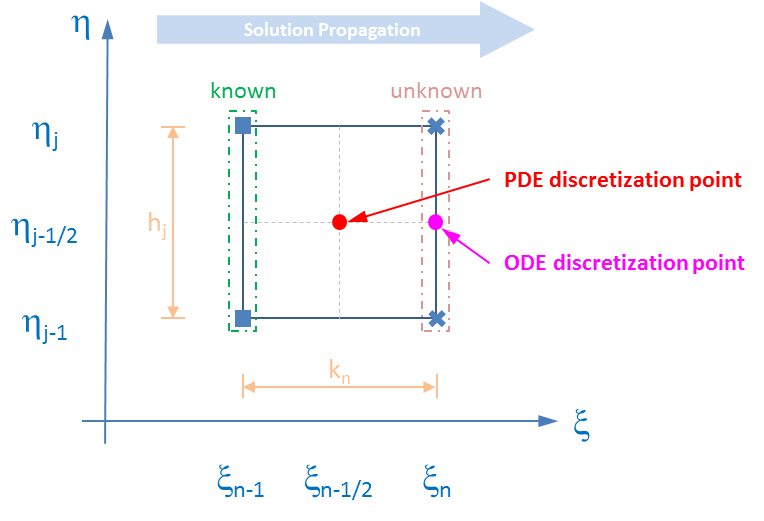

In [12]:
Image(filename='D:\Dropbox\JET\Keller_BOX.png', width=600)

#### ODE Discretization

\begin{equation}
f' = \frac{df}{d\eta} = u
\end{equation}

Using central differences to dicretize this ODE at the unknown location (see *ODE discretization point* in above figure) results in:

\begin{equation}
\frac{1}{h_j}(f_{j}^{n}-f_{j-1}^{n}) = \frac{1}{2}(u_{j}^{n}+u_{j-1}^{n})
\end{equation}

and likewise fro the remaining two ODEs:

\begin{equation}
\frac{1}{h_j}(u_{j}^{n}-u_{j-1}^{n}) = \frac{1}{2}(v_{j}^{n}+v_{j-1}^{n})
\end{equation}

\begin{equation}
\frac{1}{h_j}(g_{j}^{n}-g_{j-1}^{n}) = \frac{1}{2}(p_{j}^{n}+p_{j-1}^{n})
\end{equation}

####PDE Discretization

The PDE is again discretized using central differences, but now at a point halfway between known and unknown quantities in the center of the "Keller BOX" (see *PDE disecretization point* in above figure).

The discretization is done one by one for each individual term. For the first term of the momentum equation it is done in a quite verbose way in order to show the process in every detail. In the last line the variables are already separated in terms of known (superscript $n-1$) and unknown (superscript $n$) positions. This is needed later for grouping the coefficients of the unknowns as well as the known terms for the matrix-vector solution procedure ($\matrix{A}\vec{x}=\vec{b}$) for the linear equation system.

\begin{align}
(bv)' = \frac{\partial (bv)}{\partial \eta} &\approx \frac{1}{h_j}\left [\left(bv\right)_{j}^{n-1/2}-\left(bv\right)_{j-1}^{n-1/2}\right ] =\\
&= \frac{1}{h_j}\left [ \frac{1}{2}\left((bv)_{j}^{n} + (bv)_{j}^{n-1}\right) - \frac{1}{2}\left((bv)_{j-1}^{n} + (bv)_{j-1}^{n-1}\right)\right] = \\
&= \frac{1}{h_j}\left [ \frac{1}{2}(b_{j}^{n}v_{j}^{n} + b_{j}^{n-1}v_{j}^{n-1}) - \frac{1}{2}(b_{j-1}^{n}v_{j-1}^{n} + b_{j-1}^{n-1}v_{j-1}^{n-1})\right] = \\
&= \frac{1}{2 h_j} \left(b_{j}^{n}v_{j}^{n} - b_{j-1}^{n}v_{j-1}^{n}\right) + \frac{1}{2 h_j}\left(b_{j}^{n-1}v_{j}^{n-1} - b_{j-1}^{n-1}v_{j-1}^{n-1}\right) \\
\quad \\
u^2 &\approx \left (u^2 \right )_{j-1/2}^{n-1/2} = \\
& = \frac{1}{2} \left[\left ( u^2 \right)_{j-1/2}^{n} + \left(u^2\right)_{j-1/2}^{n-1}\right] \\
& = \frac{1}{4}\left[\left ( u^2 \right)_{j}^{n} + \left ( u^2 \right)_{j-1}^{n}\right] + \frac{1}{4}\left[\left ( u^2 \right)_{j}^{n-1} + \left ( u^2 \right)_{j-1}^{n-1}\right]\\
\quad \\
fv &\approx \left (fv \right )_{j-1/2}^{n-1/2} = \\
& = \frac{1}{4}\left(f_{j}^{n}v_{j}^{n} + f_{j-1}^{n}v_{j-1}^{n}\right) + \frac{1}{4}\left ( f_{j}^{n-1}v_{j}^{n-1} + f_{j-1}^{n-1}v_{j-1}^{n-1}\right) \\
\quad \\
3\xi &= 3\xi^{n-1/2} = \frac{3}{2}\left(\xi^n+\xi^{n-1}\right)
\quad \\
u &\approx u_{j-1/2}^{n-1/2} = \\
& = \frac{1}{2} \left(u_{j-1/2}^{n} + u_{j-1/2}^{n-1}\right) \\
& = \frac{1}{4}\left(u_{j}^{n} + u_{j-1}^{n}\right) + \frac{1}{4}\left(u_{j}^{n-1} + u_{j-1}^{n-1}\right)\\
\quad \\
\frac{\partial u}{\partial \xi} &\approx \frac{1}{k_n}\left (u_{j-1/2}^{n}-u_{j-1/2}^{n-1}\right ) =\\
&= \frac{1}{2 k_n}\left (u_{j}^{n}+u_{j-1}^{n}\right) - \frac{1}{2 k_n}\left (u_{j}^{n-1}+u_{j-1}^{n-1}\right) = \\
\quad \\
v &\approx v_{j-1/2}^{n-1/2} = \\
& = \frac{1}{2} \left(v_{j-1/2}^{n} + v_{j-1/2}^{n-1}\right) \\
& = \frac{1}{4}\left(v_{j}^{n} + v_{j-1}^{n}\right) + \frac{1}{4}\left(v_{j}^{n-1} + v_{j-1}^{n-1}\right)\\
\quad \\
\frac{\partial f}{\partial \xi} &\approx \frac{1}{k_n}\left (f_{j-1/2}^{n}-f_{j-1/2}^{n-1}\right ) =\\
&= \frac{1}{2 k_n}\left (f_{j}^{n}+f_{j-1}^{n}\right) - \frac{1}{2 k_n}\left (f_{j}^{n-1}+f_{j-1}^{n-1}\right)\\
\quad \\
\end{align}

After multiplying by 2, the complete discretized reduced order momentum equation now is:

\begin{equation}
\frac{1}{h_j} \left(b_{j}^{n}v_{j}^{n} - b_{j-1}^{n}v_{j-1}^{n}\right) + \frac{1}{h_j}\left(b_{j}^{n-1}v_{j}^{n-1} - b_{j-1}^{n-1}v_{j-1}^{n-1}\right) + \frac{1}{2}\left[\left ( u^2 \right)_{j}^{n} + \left ( u^2 \right)_{j-1}^{n}\right] + \frac{1}{2}\left[\left ( u^2 \right)_{j}^{n-1} + \left ( u^2 \right)_{j-1}^{n-1}\right] + \frac{1}{2}\left(f_{j}^{n}v_{j}^{n} + f_{j-1}^{n}v_{j-1}^{n}\right) + \frac{1}{2}\left ( f_{j}^{n-1}v_{j}^{n-1} + f_{j-1}^{n-1}v_{j-1}^{n-1}\right) = 3 \left(\xi^n+\xi^{n-1}\right) \left \{ \left[ \frac{1}{2}\left(u_{j}^{n} + u_{j-1}^{n}\right) + \frac{1}{2}\left(u_{j}^{n-1} + u_{j-1}^{n-1}\right) \right]\left[ \frac{1}{k_n}\left (u_{j}^{n}+u_{j-1}^{n}\right) - \frac{1}{k_n}\left (u_{j}^{n-1}+u_{j-1}^{n-1}\right)\right] + \left[ \frac{1}{2}\left(v_{j}^{n} + v_{j-1}^{n}\right) + \frac{1}{2}\left(v_{j}^{n-1} + v_{j-1}^{n-1}\right)\right]\left[\frac{1}{k_n}\left (f_{j}^{n}+f_{j-1}^{n}\right) - \frac{1}{k_n}\left (f_{j}^{n-1}+f_{j-1}^{n-1}\right)\right]   \right\}
\end{equation}